In [9]:
# -------------------------------------------------------------------------
# Author:   Alberto Frizzera, info@albertofrizzera.com
# Date:     10/10/2023
# -------------------------------------------------------------------------

import os
import sys
sys.path.append(os.path.join("../../../"))

import pandas as pd
import numpy as np
import pickle
import time
from dotenv import load_dotenv
import shutil
from PIL import Image
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
import gc
from sklearn.model_selection import train_test_split
import json

## Build

In [10]:
data = json.load(open(os.path.join(os.environ["BENCHMARK_DATASETS"],"RSITMD/labels/dataset_RSITMD.json"),"rb"))["images"]

In [11]:
df = pd.DataFrame()

for sample in tqdm(data):
    for i in range(len(sample["sentences"])):
        row = {"filename": sample["filename"],
               "img_id": sample["imgid"],
               "split": sample["split"],
               "label": sample["filename"].split("_")[0],
               "sent_id": sample["sentids"][i],
               "sentence": sample["sentences"][i]["raw"]}
        df = pd.concat([df, pd.DataFrame([row])]).reset_index(drop=True)

100%|██████████| 4743/4743 [00:27<00:00, 170.47it/s]


In [12]:
df_train = df[df["split"]=="train"]
df_test = df[df["split"]=="test"]
df_train, df_val = train_test_split(df_train, test_size=0.2, stratify=df_train["label"])

print("Train samples: ",df_train.shape[0])
print("Test samples: ",df_test.shape[0])
print("Val samples: ",df_val.shape[0])

Train samples:  17164
Test samples:  2260
Val samples:  4291


In [13]:
df_train["split"] = "train"
df_test["split"] = "test"
df_val["split"] = "val"

df = pd.DataFrame()
df = pd.concat([df_train, df_val, df_test]).reset_index(drop=True)

/tmp/ipykernel_789997/1698384569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["split"] = "test"


In [14]:
df.head()

,filename,img_id,split,label,sent_id,sentence
0,park_2496.tif,2257,train,park,11285,Many islands are in the lake surrounded by gre...
1,church_1226.tif,853,train,church,4266,a rectangle church with a big and four small r...
2,railwaystation_3253.tif,3096,train,railwaystation,15481,The high-speed railway station will stop 12 tr...
3,forest_1858.tif,1552,train,forest,7760,There are a lot of trees on the land.
4,park_2572.tif,2342,train,park,11713,There are four green lakes in the middle of th...


In [15]:
df.reset_index(drop=True, inplace=True)
pickle.dump(df, open(os.path.join(os.environ["BENCHMARK_DATASETS"],"RSITMD/labels/RSITMD.pkl"),"wb"))
df.to_csv(os.path.join(os.environ["BENCHMARK_DATASETS"],"RSITMD/labels/RSITMD.csv"), index=True, lineterminator='\r\n')

## Analysis

Text(0, 0.5, 'Occurrences')

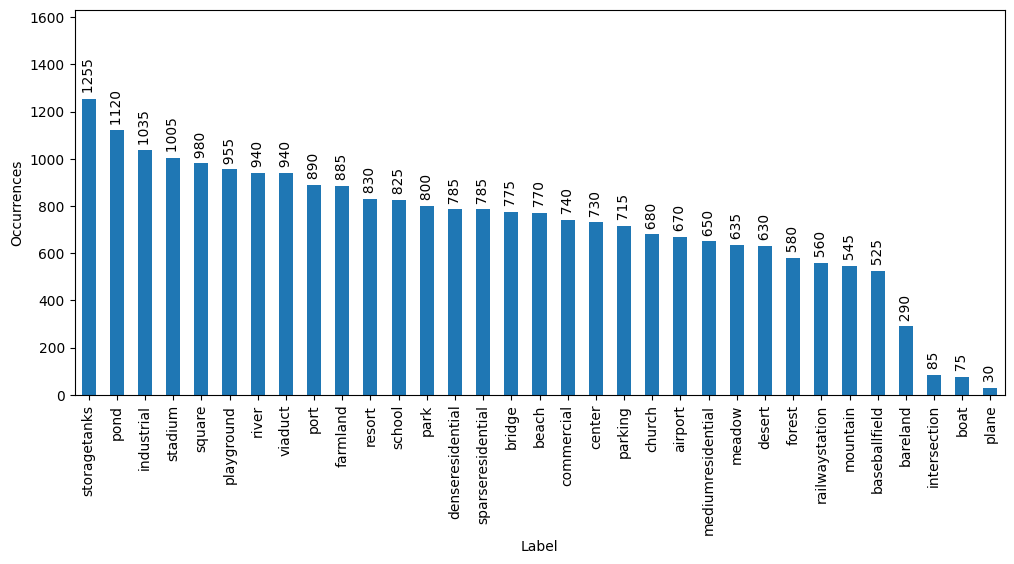

In [8]:
fig = plt.figure(figsize=(12, 5))
df["label"].value_counts().plot(kind='bar')
for index, value in enumerate(df["label"].value_counts().values):
    plt.text(index, value, "  "+str(value), rotation = 90, horizontalalignment="center")
plt.ylim([0, df["label"].value_counts()[0]+df["label"].value_counts()[0]*0.3])
plt.xlabel("Label")
plt.ylabel("Occurrences")